In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv(r'C:\Users\Mohamed Fawzi\Desktop\Product Sales Analysis\sales_data_cleaned.csv')

df.head(2)

,ordernumber,quantityordered,priceeach,orderlinenumber,sales,orderdate,status,qtr_id,month_id,year_id,...,customername,city,state,postalcode,country,territory,contactlastname,contactfirstname,dealsize,month
0,10107,30,95.70,2,2871.0,2003-02-24,Shipped,1,2,2003,...,Land of Toys Inc.,NYC,NY,10022,USA,North America,Yu,Kwai,Small,February
1,10121,34,81.35,5,2765.9,2003-05-07,Shipped,2,5,2003,...,Reims Collectables,Reims,Unknown,51100,France,EMEA,Henriot,Paul,Small,May


In [12]:
df['orderdate'] = pd.to_datetime(df['orderdate'])
#df.info()

-   Now, we'll analyze the products line performance by sales

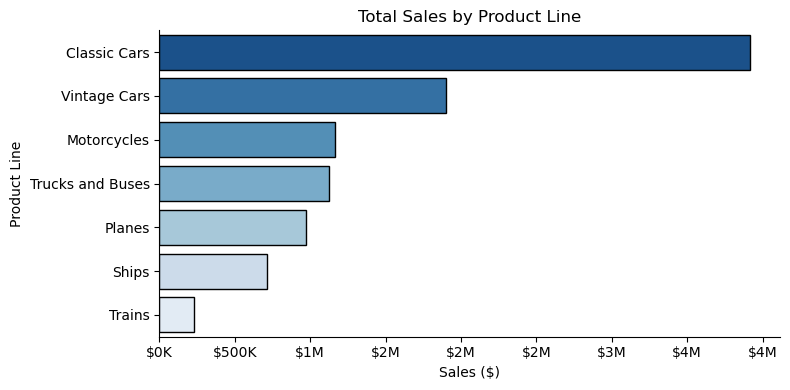

In [17]:
product_sales = df.groupby('productline')['sales'].sum().reset_index().sort_values(by='sales', ascending=False)

plt.figure(figsize=(8, 4))
sns.barplot(
    data=product_sales,
    x='sales',
    y='productline',
    palette='Blues_r',
    edgecolor='black'
)

def currency(x, pos):
    if x >= 1e6:
        return '${:,.0f}M'.format(x * 1e-6)
    else:
        return '${:,.0f}K'.format(x * 1e-3)

plt.gca().xaxis.set_major_formatter(FuncFormatter(currency))

plt.title('Total Sales by Product Line',)
plt.xlabel('Sales ($)',) 
plt.ylabel('Product Line',)

sns.despine()
plt.tight_layout()
plt.show()


## **Key Insights:**
-   This horizontal bar chart shows the total sales by product line, highlighting the best and worst-performing categories.

-   Top Performing Product Lines
    - **Classic Cars** dominate with sales near **$4M**, accounting for a significant portion of total revenue.
    - **Vintage Cars** follow at a distant second with just under **$2M** in sales.

-   Mid-Tier Product Lines
    - **Motorcycles** and **Trucks and Buses** perform similarly, each generating around **$1.3M**.
    - **Planes** also show solid performance with approximately **$1M** in total sales.

-   Low Performing Product Lines
    - **Ships** show moderate performance, falling below $1M.
    - **Trains** contribute the least, with sales below **$500K**.
----


-   Let's explore the relationship between **Unit Price** and **Quantity**

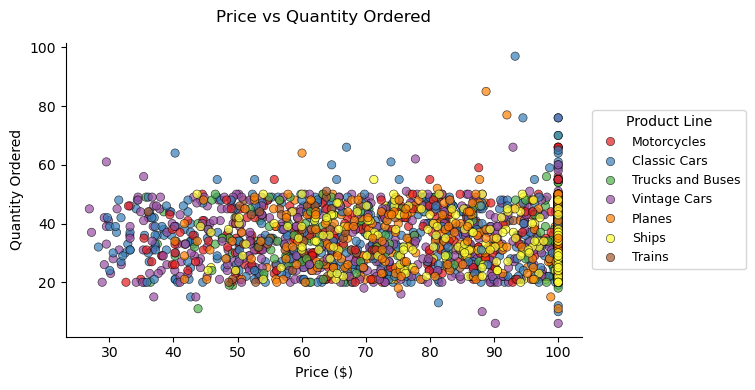

In [18]:
# Price vs Quantity Ordered
plt.figure(figsize=(8, 4))
sns.scatterplot(
    data=df,
    x='priceeach',
    y='quantityordered',
    hue='productline',
    palette='Set1',
    alpha=0.7,
    edgecolor='black',
)


plt.title('Price vs Quantity Ordered', pad=15)
plt.xlabel('Price ($)')
plt.ylabel('Quantity Ordered')

plt.legend(title='Product Line', loc='center right', bbox_to_anchor=(1.08, 0.0, 0.25, 1.0), fontsize=9)

sns.despine()
plt.tight_layout()
plt.show()

-   This scatter plot explores the relationship between **unit price** and **quantity ordered** across various product lines.

#   **Observations:**

-   Price Range
    - Prices span from **$30 to $100**, with a noticeable **cluster near the $100 mark**, likely due to premium products (e.g., **Classic Cars**).

-   Quantity Ordered
    - Most orders fall between **20 and 50 units**, regardless of price.
    - A few outliers show quantities exceeding **80–100 units**, particularly around the **$90–$100** range.

-   Distribution by Product Line
    - The plot shows **no strong negative correlation** between price and quantity, which suggests:
    - Customers are **still ordering high-priced items** in reasonable quantities.

-   Product Line Highlights
    - **Classic Cars** and **Vintage Cars** appear frequently in the high-price range ($90–$100), reinforcing their revenue dominance.
    - **Motorcycles** and **Trucks and Buses** span a wide price range, showing **diverse product offerings**.
    - **Trains** and **Ships** are less dense in the plot, supporting earlier insights on lower sales.

    -----


